<center><h1> Approximations de rang faible: SVD et PCA </h1></center>

In [3]:
# import de quelques packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc  # envisager scipy.datasets pour scipy>=1.12
from sklearn.datasets import fetch_openml
import pickle  # uniquement si utilisation de pickle.load

# SVD (Singular value decomposition)

Cette partie illustre la décomposition en valeur singulières (SVD) d'une matrice. Pour cela, prendre une image en niveaux de gris de votre choix. Cette image, considérée comme une matrice, sera approximée par une matrice de rang plus faible en prenant la SVD

## Charger une image et l'afficher

Fonctions utiles: 
- `plt.imread` (fichier image) ou `pickle.load` (si format .dat)
- `plt.imshow`

/var/folders/mh/qbflx3t95v50443wx0fdcct40000gn/T/ipykernel_12669/3008921277.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  s = misc.face(gray=True)


([], [])

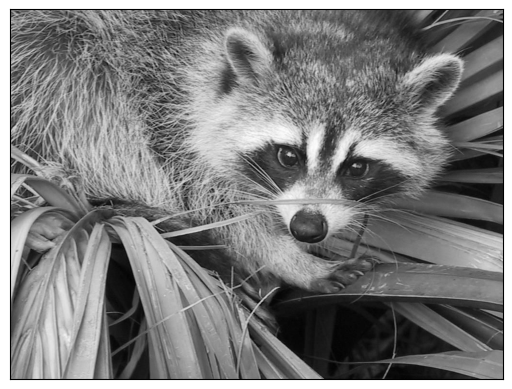

In [4]:
s = misc.face(gray=True)
plt.imshow(s, cmap='gray')
plt.xticks(())
plt.yticks(())

## Calcul de la SVD

- Calculer la SVD (`np.linalg.svd`)
- Vérifier l'exactitude de la décomposition (`np.allclose`)

In [5]:
# Calcul et vérification svd

# A VOUS DE JOUER
svd= np.linalg.svd(np.array(s), full_matrices=False)
u, s1, vh = svd
print(f"Taille de la matrice U: {u.shape}")
print(f"Taille de la matrice S: {s1.shape}")
print(f"Taille de la matrice Vh: {vh.shape}")
w= np.allclose(s, u @ np.diag(s1) @ vh)
print(f"Product of SVD result yields original matrix: {svd} ")
print('they are equal:', w) # True
print(50*"#")

Taille de la matrice U: (768, 768)
Taille de la matrice S: (768,)
Taille de la matrice Vh: (768, 1024)
Product of SVD result yields original matrix: SVDResult(U=array([[ 0.03178047,  0.01899494,  0.01767694, ..., -0.00515354,
        -0.02000072, -0.00536943],
       [ 0.03188899,  0.01772787,  0.01609502, ...,  0.01819321,
         0.05044649, -0.00025865],
       [ 0.03273099,  0.01230324,  0.01228203, ..., -0.00532875,
        -0.05318634,  0.00289746],
       ...,
       [ 0.03034585, -0.03641649,  0.00249968, ...,  0.04908979,
        -0.07563333,  0.08396142],
       [ 0.03011329, -0.03554472,  0.00048348, ..., -0.03926725,
         0.07966796, -0.03974808],
       [ 0.03001502, -0.0346442 , -0.00087503, ...,  0.01853222,
        -0.03471804,  0.00336473]]), S=array([1.03201724e+05, 2.16102403e+04, 1.60637957e+04, 1.15821292e+04,
       1.05951786e+04, 9.66345795e+03, 7.99184891e+03, 6.87677857e+03,
       6.69588499e+03, 6.59355476e+03, 5.91453280e+03, 5.42886595e+03,
       4.5

## Approximation de rang faible

Tronquer la SVD et approximer l'image comme une matrice de rang faible. On prendra plusieurs exemples avec un nombre croissant de valeurs singulières conservées.

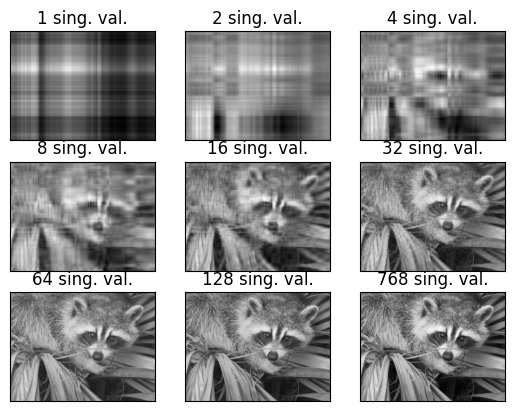

In [6]:
fig, ax = plt.subplots(3, 3)
listsingval = [1, 2, 4, 8, 16, 32, 64, 128, len(s)]
for (iterax, nsingval) in zip(np.ndenumerate(ax), listsingval):
    imageapprox = u[:, :nsingval] @ np.diag(s1[:nsingval]) @ vh[:nsingval, :]
    iterax[1].imshow(imageapprox, cmap='gray')
    iterax[1].set_xticks(())
    iterax[1].set_yticks(())
    iterax[1].set_title(f"{nsingval} sing. val.")

<h1> PCA (Principal component analysis) </h1>

Cette partie illustre la décomposition en valeurs principales sur la base de données MNIST. 

## Chargement et affichage des données

- Charger la base de données en question (70000 images, chacune de 784 pixels)
- Afficher quelques unes des images MNIST (vérifier leur taille)
- Séparer en un "training set" et un "test set". On pensera à renormaliser les données par 255 (images en 256 niveaux de gris).

In [7]:
# Chargement de la base de données MNIST
# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml("mnist_784", version=1,
                                return_X_y=True, as_frame=False,
                                data_home="./scikit_learn_data")
# ## -> images dans X et labels dans y

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


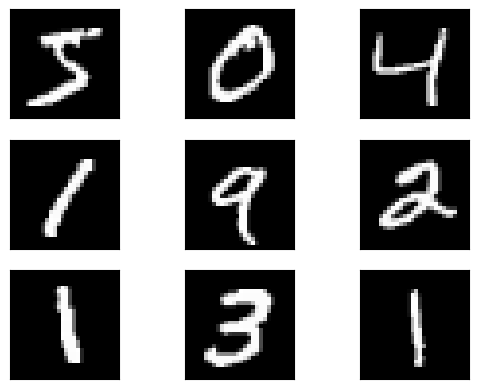

In [8]:
ntrainsamples = 60000
Xtrain = X_mnist[0:ntrainsamples, :]/255
Xtest = X_mnist[60000:, :]/255

# Xtrain = Xtrain- Xtrain.mean(axis=0)

fig, ax = plt.subplots(3, 3)
for (iterax, i) in zip(np.ndenumerate(ax), range(9)):
    iterax[1].imshow(Xtrain[i].reshape(28, 28), cmap='gray')
    iterax[1].set_xticks(())
    iterax[1].set_yticks(())

## Calcul de la PCA

Calculer la matrice de covariance empirique; calculer ses vecteurs et valeurs propres (`np.linalg.eigh`) pour la diagonaliser.

In [18]:
print(f"Taille de la matrice Xtrain: {Xtrain.shape} {len(Xtrain)}")

C =(Xtrain.T @ Xtrain)/len(Xtrain)
L, U = np.linalg.eigh(C)
L = np.flip(L)
print(f"Matrice L: {L.shape}")
print(f"Matrice U: {U.shape}")
print(f"Matrice U: {U}")
true= np.allclose(U, np.zeros(len(U)))
print(f"Matrice proche de 0: {true}")
print(f"Matrice L: {L}")

Taille de la matrice Xtrain: (60000, 784) 60000
Matrice L: (784,)
Matrice U: (784, 784)
Matrice U: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Matrice proche de 0: False
Matrice L: [ 3.80910708e+01  4.39013077e+00  3.74097638e+00  3.22570852e+00
  2.78619335e+00  2.27734815e+00  1.91843121e+00  1.53616541e+00
  1.51802118e+00  1.24601544e+00  1.12080388e+00  1.08149289e+00
  9.04823657e-01  8.99446994e-01  8.38873249e-01  7.85396941e-01
  7.20252440e-01  6.83173777e-01  6.27174410e-01  6.07808633e-01
  5.62190172e-01  5.30928610e-01  5.03285374e-01  4.82274063e-01
  4.66230567e-01  4.42899108e-01  4.29374898e-01  4.14654851e-01
  3.92683721e-01  3.64327317e-01  3.47174045e-01  3.41846702e-01
  3.17915088e-01  3.11413859e-01  3.00606342e-01  2.86996362e-01
  2.66684072e-01  2.57231670e-01  2.53855827e-01  2.49214795e-01
  2.41119593e-01  2.34589959e-01  2.21562212e-01  2.10000

Les valeurs propres représentent un pourcentage expliqué de la variance: tracer ce pourcentage en fonction du nombre de composantes de PCA conservées (fonction utile: `np.cumsum`).

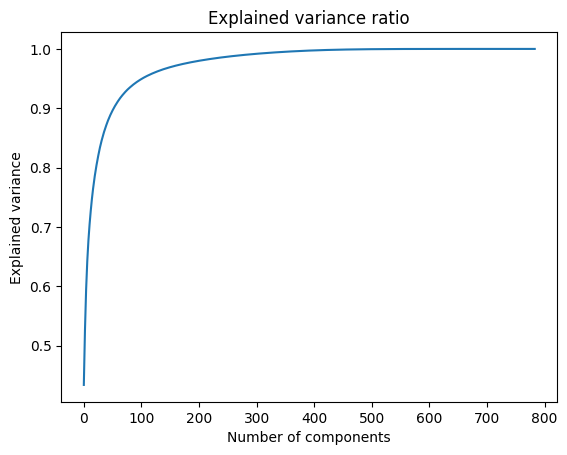

In [20]:
plt.plot(np.cumsum(L, axis=0)/np.sum(L))    
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance ratio')

plt.show()


Pour quelques images (choisies dans le training ou testing set), afficher leur approximation à partir de 10, 50, 100 et 300 composantes de la PCA.

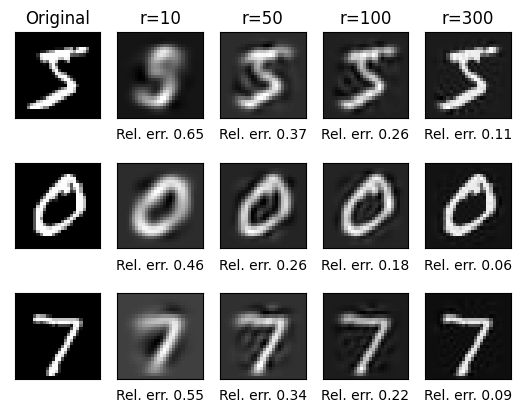

In [ ]:
# A VOUS DE JOUER

## Application à un débruitage basique

Reprendre le même problème avec des images bruitées.
- Charger la base de données en question (70000 images, chacune de 784 pixels)
- Séparer en un "training set" et un "test set" et renormaliser les données par 255 (images en 256 niveaux de gris).
- Après renormalisation, ajouter un bruit gaussien. On seuillera les données pour avoir des valeurs entre 0 et 1.
- Afficher quelques images bruitées.

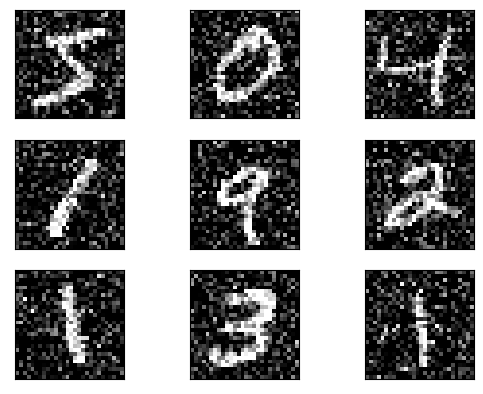

In [ ]:
# A VOUS DE JOUER

Effectuer une PCA et tracer le pourcentage de variance expliqué en fonction du nombre de composantes considérées.

Text(0, 0.5, 'Percentage variance explained (from eigenvalues)')

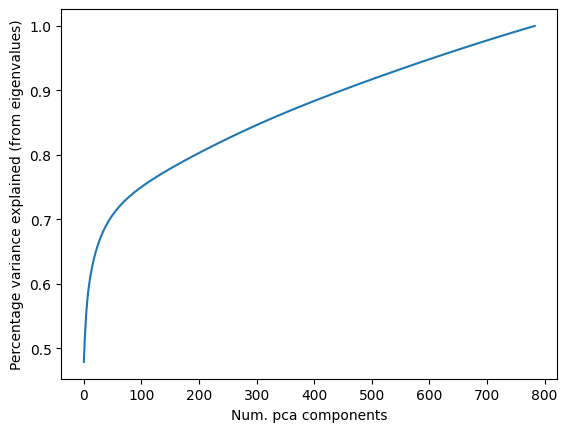

In [ ]:
# A VOUS DE JOUER

Pour quelques images (choisies dans le training ou testing set), afficher leur approximation à partir de 10, 50, 100 et 300 composantes de la PCA. Utiliser cette méthode pour effectuer un débruitage basique.

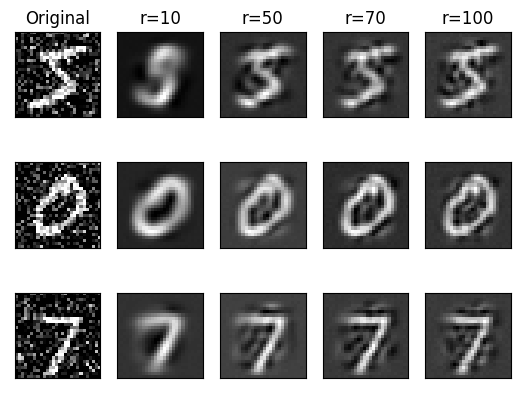

In [ ]:
# A VOUS DE JOUER